## FINAL STATISTIC PROJECT WITH PYTHON
### DATA BOSTON HOUSING AGENCY
---

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

In [4]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## DECRIPTIVE
-----

### Median value of owner-occupied homes
---

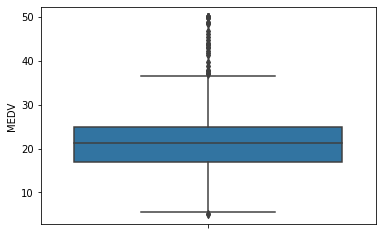

In [6]:
ax = sns.boxplot(y='MEDV', data=boston_df)

### Histogram for Charles river
---

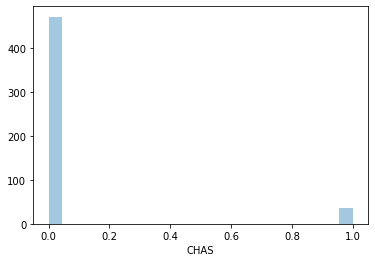

In [8]:
ax = sns.distplot(boston_df['CHAS'], kde=False)

### Boxplot for the MEDV variable vs the AGE variable
---

In [11]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

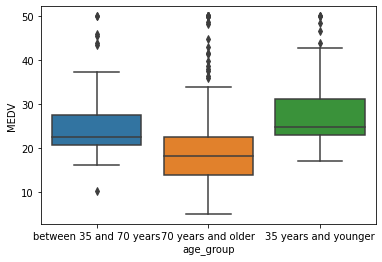

In [12]:
ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df)

### Scatter plot about the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town
---

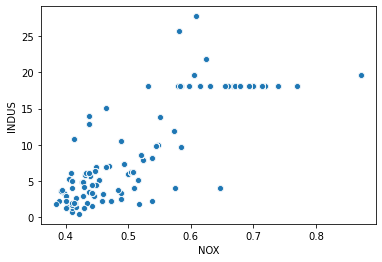

In [13]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)

An incremental relationship between the concentration of nitric oxides and the proportion of commercial acres can be observed until the concentration reaches a value of 0.6 where a straight line begins to be seen.

### Histogram about pupil to teacher
---

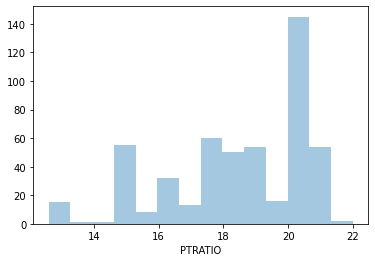

In [14]:
ax = sns.distplot(boston_df['PTRATIO'], kde=False)

## TESTING
---

### Value of houses bounded by the Charles river (T-test)
---

In [16]:
stats.levene(boston_df[boston_df['CHAS']==1]['MEDV'],
             boston_df[boston_df['CHAS']==0]['MEDV'],
             center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [17]:
stats.ttest_ind(boston_df[boston_df['CHAS']==1]['MEDV'],
                boston_df[boston_df['CHAS']==0]['MEDV'],
                equal_var=True)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

**CONCLUSION:** There is no a significant difference in median value of houses bounded by the Charles river

### Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (ANOVA)
---

In [18]:
stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
             boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'],
             boston_df[boston_df['age_group'] == '70 years and older']['MEDV'],
             center = 'mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [19]:
thirtyfive_lower_med = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy_med = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
fiftyseven_older_med = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']
f_statistic, p_value = stats.f_oneway(thirtyfive_lower_med, thirtyfive_seventy_med, fiftyseven_older_med)
print('F_Statistic: {0}, P-Value: {1}'.format(f_statistic, p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**CONCLUSION:** There is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940

### Relationship between Nitric oxide concentrations and proportion of non-retail business acres per town (PEARSON)
---

In [20]:
correlation, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print('Correlation: {0}, P-value: {1}'.format(correlation, p_value))

Correlation: 0.763651446920915, P-value: 7.913361061239593e-98


**CONCLUSION:** There is a positive relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

### Impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes (REGRESSION)
---

In [22]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 08 Dec 2020   Prob (F-statistic):           1.21e-08
Time:                        01:00:13   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**CONCLUSION:** The impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes is 0.249. 

## THANKS